In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.20MB/s]


In [ ]:
!unzip customer-segmentation-tutorial-in-python.zip

Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [ ]:
#importing dependencies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.shape

(200, 5)

In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Count'>

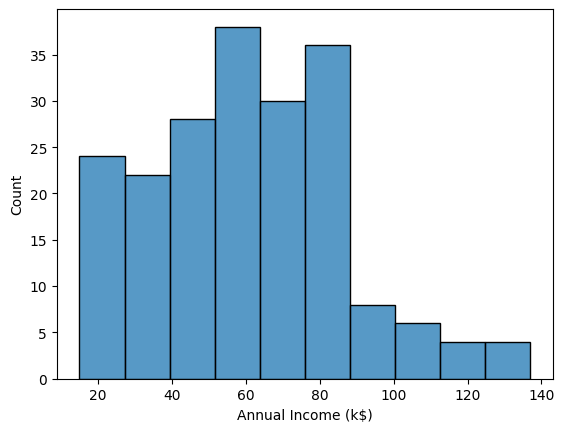

In [ ]:
sns.histplot(data['Annual Income (k$)'])

In [ ]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

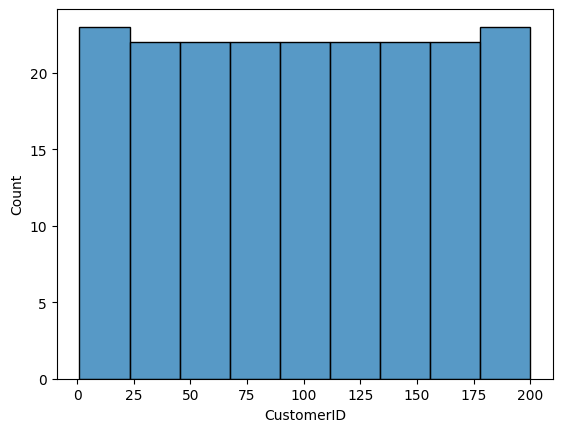

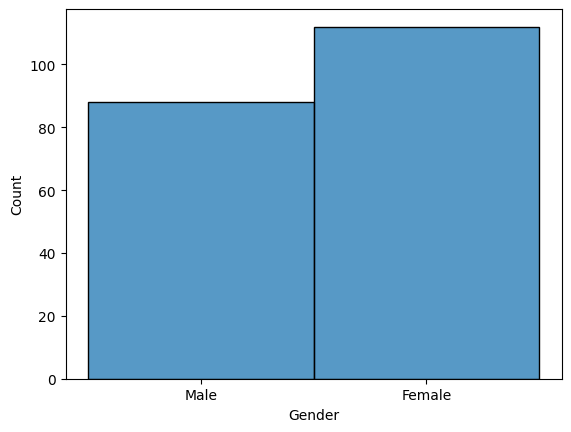

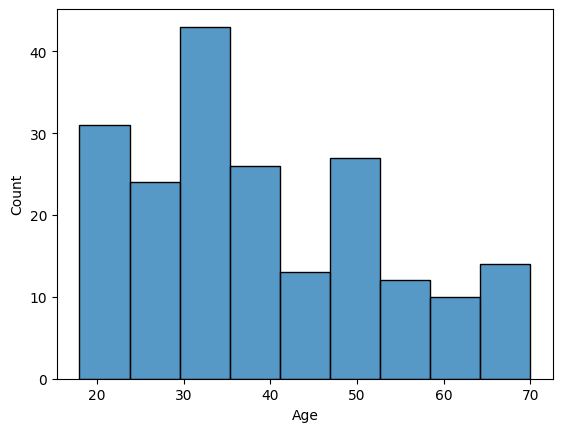

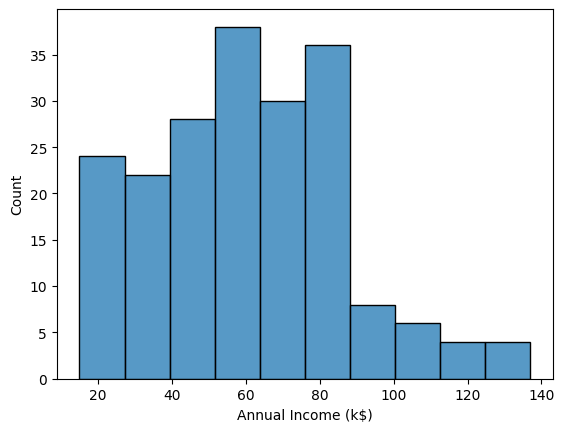

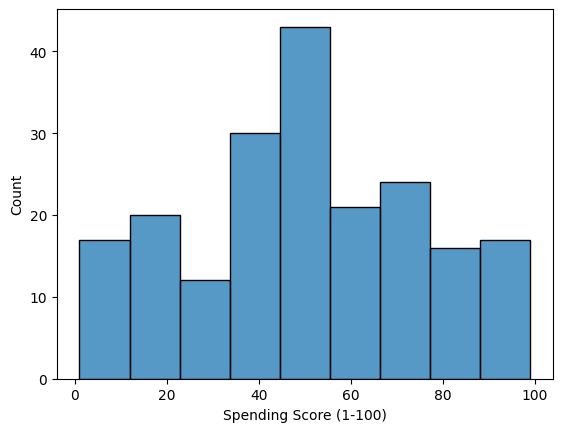

In [ ]:
column = ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in column:
  plt.figure()
  sns.histplot(data[i])

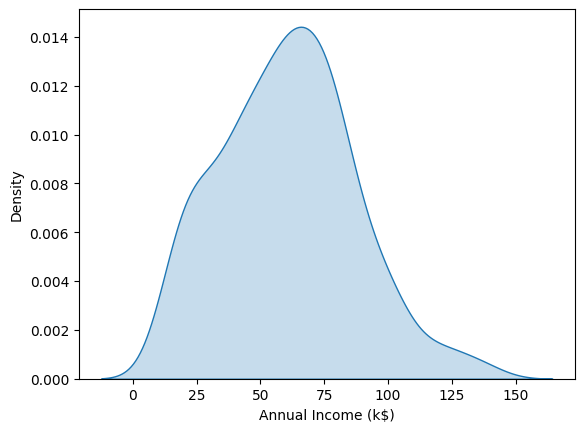

In [ ]:
sns.kdeplot(data['Annual Income (k$)'], fill=True)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Density')
plt.show()

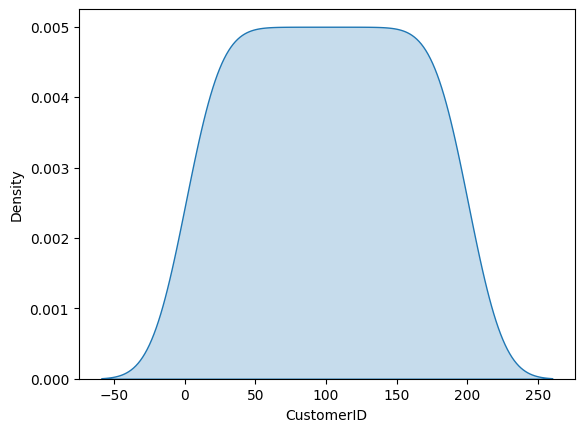

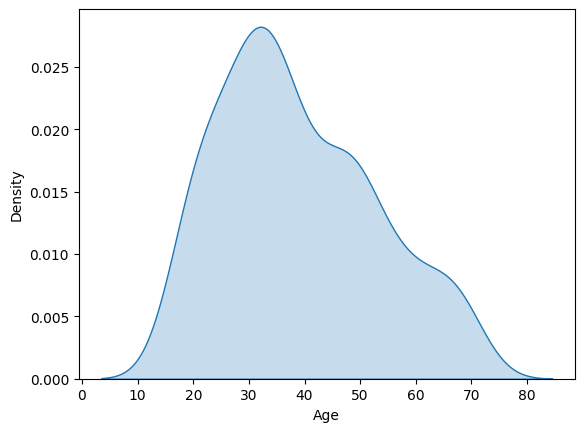

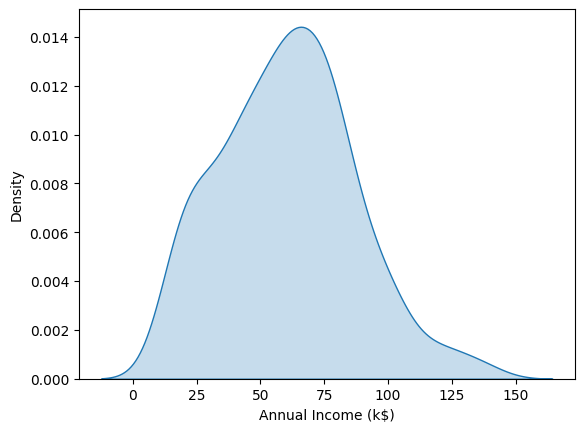

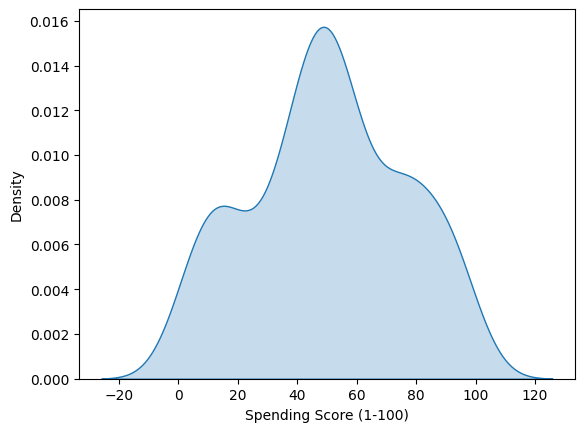

In [ ]:
column = ['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for x in column:
  plt.figure()
  sns.kdeplot(data[x],fill=True)

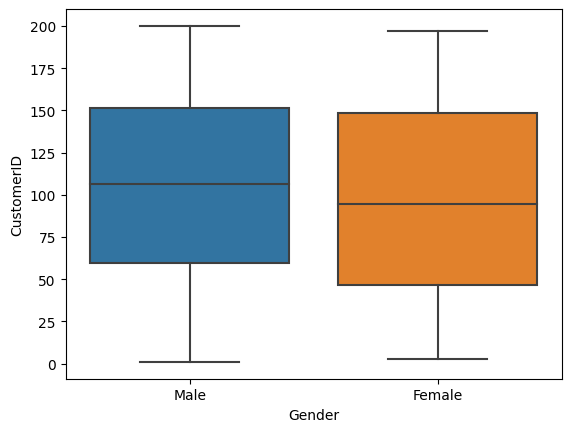

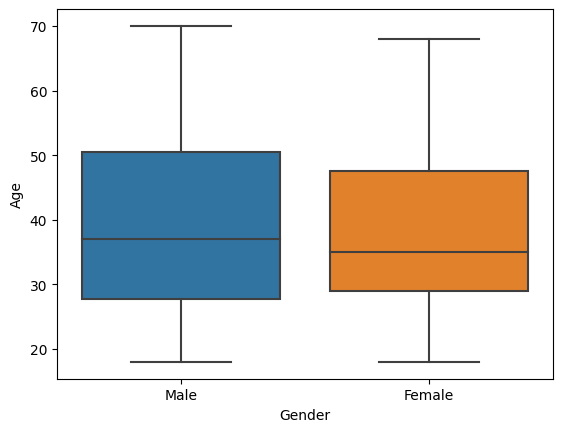

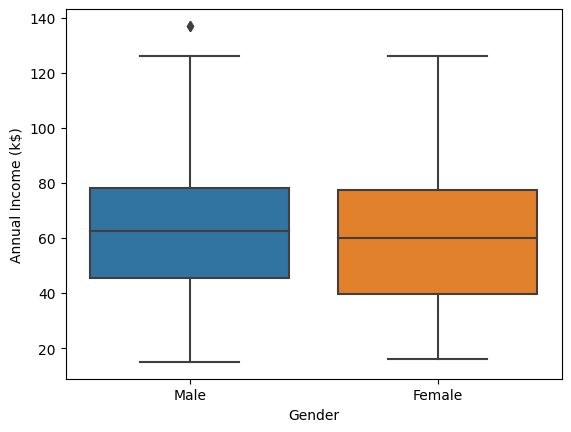

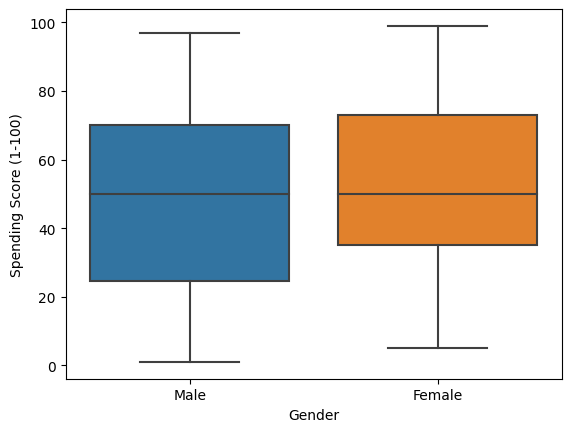

In [ ]:
column = ['CustomerID', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']

for i in column:
  plt.figure()
  sns.boxplot(data=data,x='Gender',y=data[i])

In [ ]:
data['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

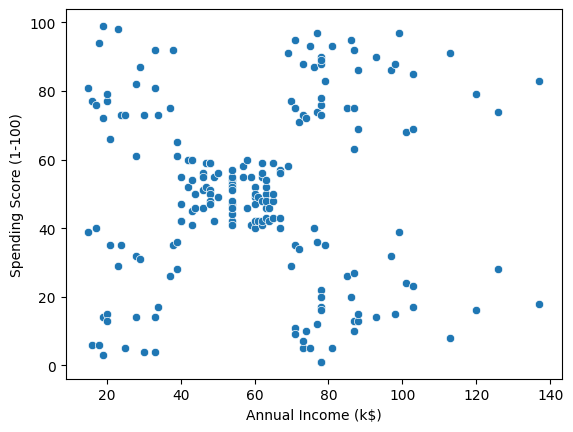

In [ ]:
sns.scatterplot(data=data,x='Annual Income (k$)',y='Spending Score (1-100)')
plt.show()

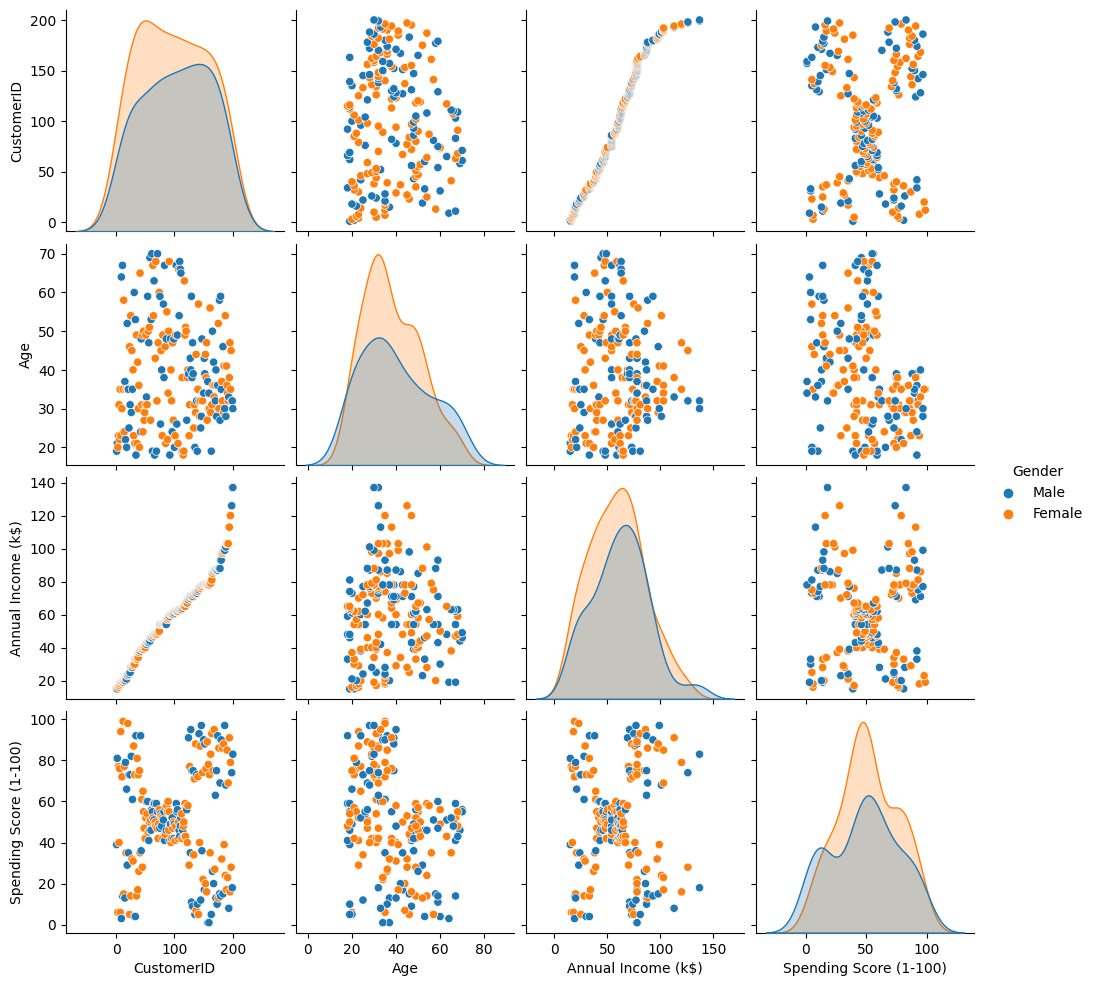

In [ ]:
sns.pairplot(data,hue='Gender')
plt.show()

In [ ]:
def g(data):
  data2 = data.pivot_table(index='Gender', values=['Annual Income (k$)', 'Age', 'Spending Score (1-100)'],aggfunc='mean')
  return data2
data2 = g(data.copy())

In [ ]:
print(data2)

              Age  Annual Income (k$)  Spending Score (1-100)
Gender                                                       
Female  38.098214           59.250000               51.526786
Male    39.806818           62.227273               48.511364


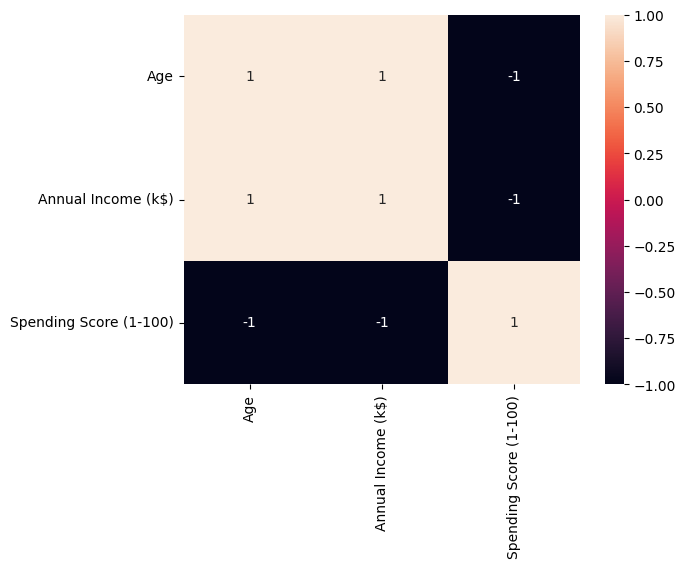

In [ ]:
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [ ]:
clustering1= KMeans(n_clusters=4 , random_state = 42,n_init=10)

In [ ]:
clustering1.fit(data[['Annual Income (k$)']])

KMeans(n_clusters=4, n_init=10, random_state=42)

In [ ]:
clustering1.labels_


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
data['income cluster']=clustering1.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [ ]:
data['income cluster'].value_counts()

0    68
1    62
2    50
3    20
Name: income cluster, dtype: int64

In [ ]:
clustering1.inertia_

13278.112713472483

In [ ]:
!pip install yellowbrick

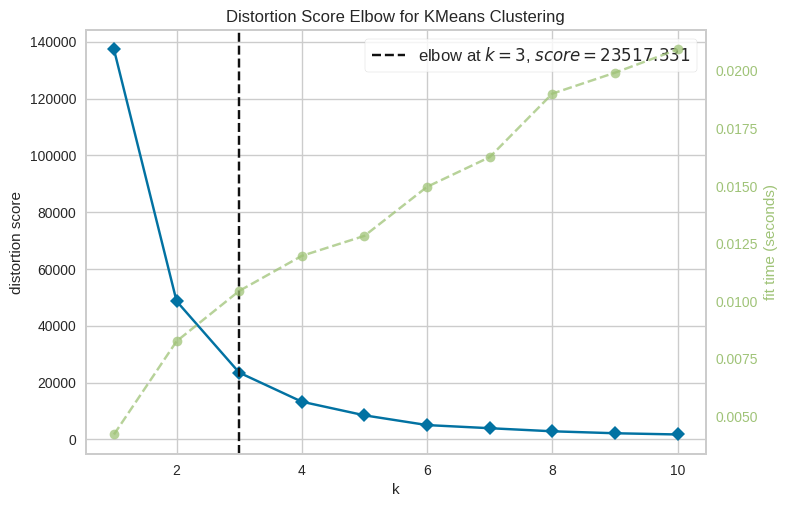

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


features = ['Annual Income (k$)']

model = KMeans(n_clusters=i, n_init=10)  # set n_init explicitly
model.fit(data[['Annual Income (k$)']])

# Instantiate the visualizer with the KMeans model and the dataset
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit the data and visualize
visualizer.fit(data[features])
visualizer.show()
plt.show()


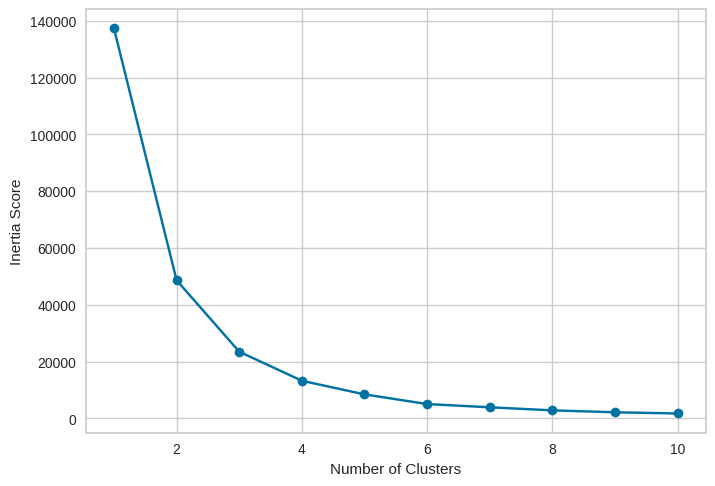

In [ ]:
feature = ['Annual Income (k$)']

# Create an array to store inertia scores
inertia_scores = []

# Define a range of cluster numbers (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data[feature])
    inertia_scores.append(kmeans.inertia_)

# Plot the inertia scores
plt.plot(range(1, 11), inertia_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()


In [ ]:
inertia_scores

[137277.28000000006,
 48660.888888888876,
 23517.33093093093,
 13278.112713472483,
 8481.49619047619,
 5081.484660267268,
 3936.796825396824,
 2857.441697191697,
 2176.2809523809533,
 1761.8055555555566]

In [ ]:
data.groupby('income cluster')[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].mean()

,Age,Spending Score (1-100),Annual Income (k$)
income cluster,,,
0,43.970588,50.014706,54.764706
1,36.838710,50.403226,77.806452
2,35.280000,49.480000,27.400000
3,36.600000,52.000000,109.700000


In [ ]:
clustering2=KMeans(n_clusters=5,n_init=10,random_state=42)
clustering2.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

KMeans(n_clusters=5, n_init=10, random_state=42)

In [ ]:
clustering2.labels_
data['spending score & annual income']=clustering2.labels_
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income
0,1,Male,19,15,39,2,2
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,2,2


In [ ]:
clustering2.inertia_

44448.4554479337

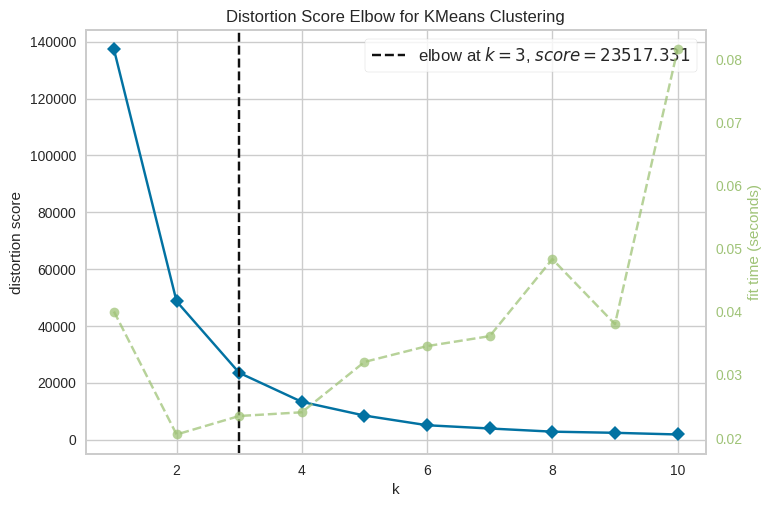

In [ ]:
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans


features = ['Annual Income (k$)']

model = KMeans(n_clusters=i, n_init=10)  # set n_init explicitly
model.fit(data[['Annual Income (k$)','Spending Score (1-100)']])

# Instantiate the visualizer with the KMeans model and the dataset
visualizer = KElbowVisualizer(model, k=(1, 11))

# Fit the data and visualize
visualizer.fit(data[features])
visualizer.show()
plt.show()


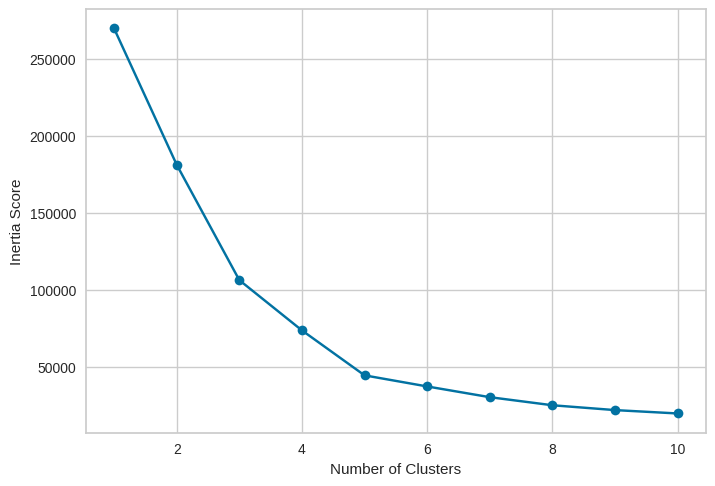

In [ ]:
feature = ['Annual Income (k$)','Spending Score (1-100)']

# Create an array to store inertia scores
inertia_scores2 = []

# Define a range of cluster numbers (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(data[feature])
    inertia_scores2.append(kmeans.inertia_)

# Plot the inertia scores
plt.plot(range(1, 11), inertia_scores2, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()


In [ ]:
inertia_scores2

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

In [ ]:
centers=pd.DataFrame(clustering2.cluster_centers_)
centers.columns=['x','y']
centers

,x,y
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


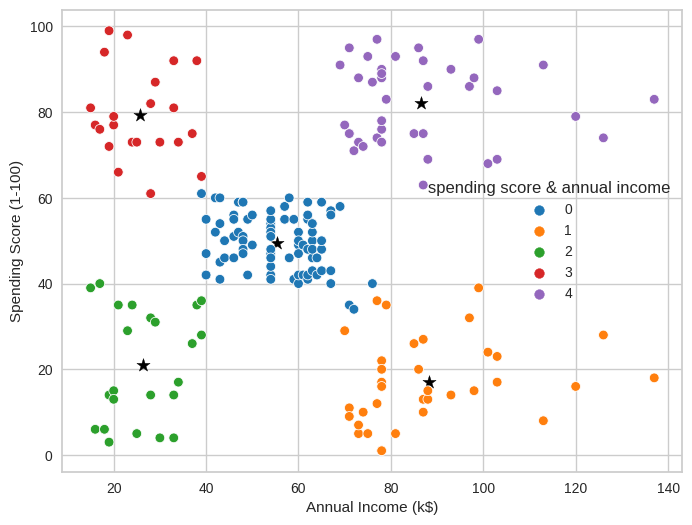

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data = data,x='Annual Income (k$)',y= 'Spending Score (1-100)',hue='spending score & annual income',palette='tab10')
plt.savefig('Clustering Bivariate.png')

In [ ]:
data.groupby('spending score & annual income')[['Age','Annual Income (k$)','Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
spending score & annual income,,,
0,42.716049,55.296296,49.518519
1,41.114286,88.200000,17.114286
2,45.217391,26.304348,20.913043
3,25.272727,25.727273,79.363636
4,32.692308,86.538462,82.128205


In [ ]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income,cluster_labels
0,1,Male,19,15,39,2,2,2
1,2,Male,21,15,81,2,3,2
2,3,Female,20,16,6,2,2,2
3,4,Female,23,16,77,2,3,2
4,5,Female,31,17,40,2,2,2
...,...,...,...,...,...,...,...,...
195,196,Female,35,120,79,3,4,3
196,197,Female,45,126,28,3,1,8
197,198,Male,32,126,74,3,4,8
198,199,Male,32,137,18,3,1,8


In [ ]:
data2=pd.get_dummies(data,drop_first=True)
data2

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income,cluster_labels,Gender_Male
0,1,19,15,39,2,2,2,1
1,2,21,15,81,2,3,2,1
2,3,20,16,6,2,2,2,0
3,4,23,16,77,2,3,2,0
4,5,31,17,40,2,2,2,0
...,...,...,...,...,...,...,...,...
195,196,35,120,79,3,4,3,0
196,197,45,126,28,3,1,8,0
197,198,32,126,74,3,4,8,1
198,199,32,137,18,3,1,8,1


In [ ]:
data2.columns

Index(['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'income cluster', 'spending score & annual income', 'cluster_labels',
       'Gender_Male'],
      dtype='object')

In [ ]:
data2=data2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
data2.head(9)

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0
5,22,17,76,0
6,35,18,6,0
7,23,18,94,0
8,64,19,3,1


In [ ]:
data2=pd.DataFrame(scale.fit_transform(data2))
data2

,0,1,2,3
0,-1.424569,-1.738999,-0.434801,1.128152
1,-1.281035,-1.738999,1.195704,1.128152
2,-1.352802,-1.700830,-1.715913,-0.886405
3,-1.137502,-1.700830,1.040418,-0.886405
4,-0.563369,-1.662660,-0.395980,-0.886405
...,...,...,...,...
195,-0.276302,2.268791,1.118061,-0.886405
196,0.441365,2.497807,-0.861839,-0.886405
197,-0.491602,2.497807,0.923953,1.128152
198,-0.491602,2.917671,-1.250054,1.128152


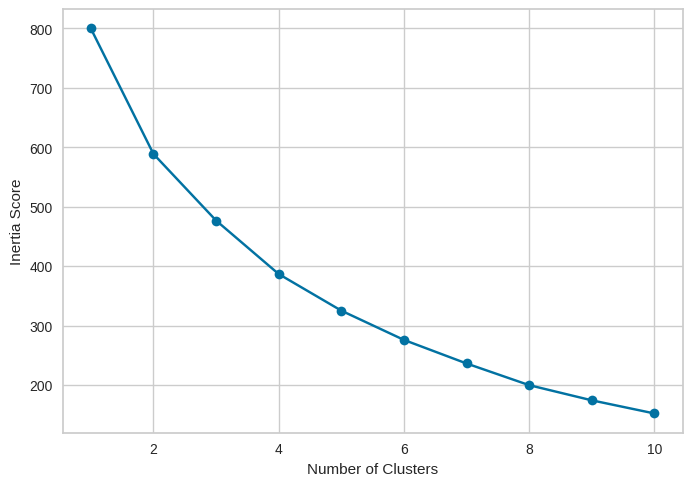

In [ ]:
# Create an array to store inertia scores
inertia_scores3 = []

# Define a range of cluster numbers (e.g., from 1 to 10)
for i in range(1, 11):
    kmeans3 = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans3.fit(data2)
    inertia_scores3.append(kmeans3.inertia_)

# Plot the inertia scores
plt.plot(range(1, 11), inertia_scores3, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score')
plt.show()


In [ ]:
data.to_csv('Clustering_data.csv')

In [ ]:
cluster_data = pd.read_csv('/content/Clustering_data.csv')

In [ ]:
cluster_data.head()

,Unnamed: 0,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),income cluster,spending score & annual income,cluster_labels
0,0,1,Male,19,15,39,2,2,2
1,1,2,Male,21,15,81,2,3,2
2,2,3,Female,20,16,6,2,2,2
3,3,4,Female,23,16,77,2,3,2
4,4,5,Female,31,17,40,2,2,2
